# Analyzing the mesh

#### Visualizing the node points.

The node.npy file is loaded and visualized.  It contains a list of (x,y) coordinate values.

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


(np.float64(-6.6), np.float64(6.6), np.float64(-4.4), np.float64(4.4))

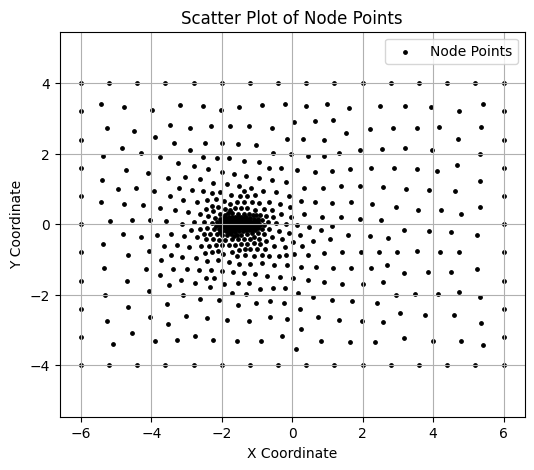

In [1]:
# prompt: Write code to load a file from google drive
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

node = jnp.load('fig/airfoil0.node.npy')

# Create a scatter plot of the node points
plt.figure(figsize=(6, 5))
plt.scatter(node[:,0], node[:,1], color='black', marker='o', s=6, label="Node Points")  # Customize color and size as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Scatter Plot of Node Points")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensures the plot scales equally in both directions

#### Visualizing the mesh

elem.npy file has the information on the nodes that form each of the cell triangle.


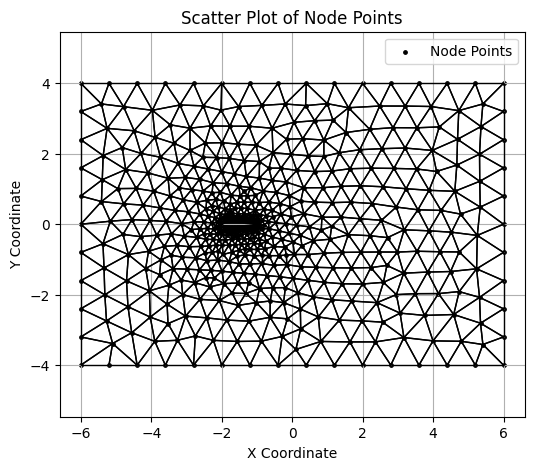

In [2]:
elem = jnp.load('fig/airfoil0.elem.npy')

# Prepare line segments for each triangle
triangle_segments = []
centroids = []

for tri in elem:
    # Get the nodes in the triangle
    p1, p2, p3 = node[tri[0]], node[tri[1]], node[tri[2]]
    # Define the lines for the triangle
    triangle_segments.append([p1, p2])
    triangle_segments.append([p2, p3])
    triangle_segments.append([p3, p1])
    centroids.append(jnp.mean(node[tri], axis=0))

# Create the scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(node[:,0], node[:,1], color='black', marker='o', s=6, label="Node Points")  # Customize color and size as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Scatter Plot of Node Points")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensures the plot scales equally in both directions

# Add triangle edges as a LineCollection
lc = LineCollection(triangle_segments, colors='black', linewidths=1)
plt.gca().add_collection(lc)

plt.show()

#### Visualizing the Neighbor information

An example cell :

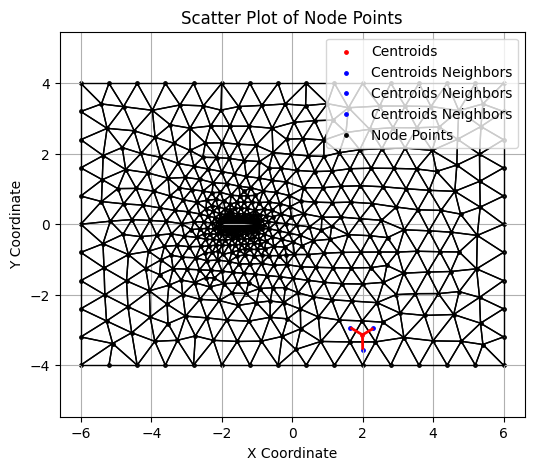

In [3]:
connect = jnp.load('fig/airfoil0.connect.npy')

# Plot centroids
i = 80
plt.figure(figsize=(6, 5))
plt.scatter(centroids[i][0], centroids[i][1], color='red', s=6, label="Centroids")
p0 = centroids[i]

neighbor_segments = []
for j in range(3):
  p1 = centroids[connect[i][j]]
  plt.scatter(p1[0], p1[1], color='blue', s=6, label="Centroids Neighbors")
  neighbor_segments.append([p0, p1])

# Create the scatter plot
plt.scatter(node[:,0], node[:,1], color='black', marker='o', s=6, label="Node Points")  # Customize color and size as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Scatter Plot of Node Points")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensures the plot scales equally in both directions

# Add triangle edges as a LineCollection
lc = LineCollection(triangle_segments, colors='black', linewidths=1)
plt.gca().add_collection(lc)

# Add triangle edges as a LineCollection
lc = LineCollection(neighbor_segments, colors='red', linewidths=2)
plt.gca().add_collection(lc)

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

An example of cell with periodic boundary condition.

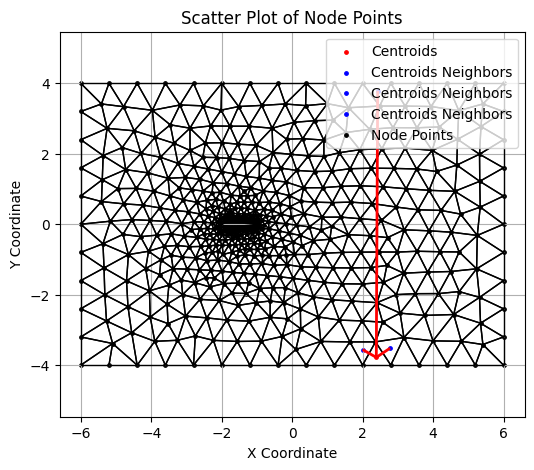

In [4]:
# Boundary cell
i = 315
plt.figure(figsize=(6, 5))
plt.scatter(centroids[i][0], centroids[i][1], color='red', s=6, label="Centroids")
p0 = centroids[i]

neighbor_segments = []
for j in range(3):
  p1 = centroids[connect[i][j]]
  plt.scatter(p1[0], p1[1], color='blue', s=6, label="Centroids Neighbors")
  neighbor_segments.append([p0, p1])

# Create the scatter plot
plt.scatter(node[:,0], node[:,1], color='black', marker='o', s=6, label="Node Points")  # Customize color and size as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Scatter Plot of Node Points")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensures the plot scales equally in both directions

# Add triangle edges as a LineCollection
lc = LineCollection(triangle_segments, colors='black', linewidths=1)
plt.gca().add_collection(lc)

# Add triangle edges as a LineCollection
lc = LineCollection(neighbor_segments, colors='red', linewidths=2)
plt.gca().add_collection(lc)

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

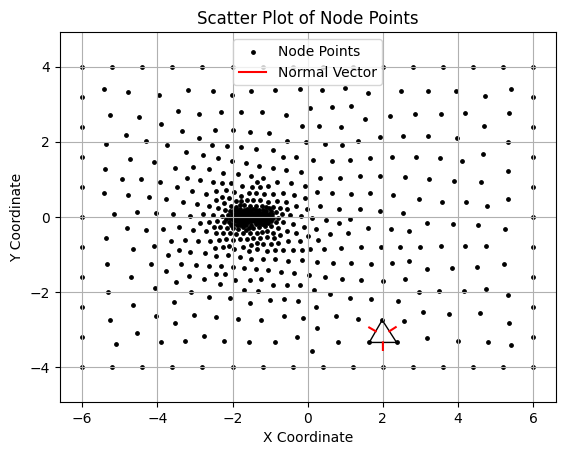

In [6]:
triangle_segments = []
normal_vectors = []
i = 80
p1, p2, p3 = node[elem[i][0]], node[elem[i][1]], node[elem[i][2]]
triangle_segments.extend([[p1, p2], [p2, p3], [p3, p1]])

# Calculate midpoints and normal vectors for each edge
edges = [(p1, p2), (p2, p3), (p3, p1)]
for edge in edges:
    # Midpoint of the edge
    mid_x = (edge[0][0] + edge[1][0]) / 2
    mid_y = (edge[0][1] + edge[1][1]) / 2

    # Vector along the edge
    dx = edge[0][0] - edge[1][0]
    dy = edge[0][1] - edge[1][1]

    # Calculate the normal vector (perpendicular to the edge)
    norm = jnp.sqrt(dx**2 + dy**2)
    nx, ny = -dy / norm, dx / norm  # Normalized perpendicular vector

    # Scale the normal vector for plotting
    normal_length = 0.2
    normal_vectors.append(((mid_x, mid_y), (mid_x + normal_length * nx, mid_y + normal_length * ny)))

# Create the scatter plot
plt.scatter(node[:,0], node[:,1], color='black', marker='o', s=6, label="Node Points")  # Customize color and size as needed
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Scatter Plot of Node Points")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensures the plot scales equally in both directions

# Add triangle edges as a LineCollection
lc = LineCollection(triangle_segments, colors='black', linewidths=1)
plt.gca().add_collection(lc)

# Plot normal vectors at each edge's midpoint
for start, end in normal_vectors:
    plt.plot([start[0], end[0]], [start[1], end[1]], 'r-', lw=1.5, label="Normal Vector" if 'Normal Vector' not in plt.gca().get_legend_handles_labels()[1] else None)

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()